In [2]:
import h5py
import numpy

In [3]:
hf = h5py.File('clean_run_0102.h5', 'r')

In [4]:
list(hf.keys())

['clean']

In [5]:
data = hf['clean']

In [6]:
event = data['0']

In [7]:
event.shape

(310, 7)

In [8]:
#list(event)

In [9]:
#event[:,0]

In [10]:
data['69630']

<HDF5 dataset "69630": shape (8, 7), type "<f8">

In [11]:
import matplotlib.pyplot as plt

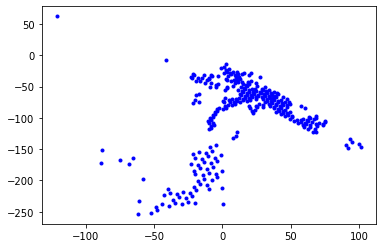

In [12]:
plt.plot(event[:,0], event[:,1], 'b.')

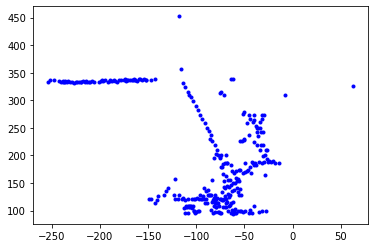

In [13]:
plt.plot(event[:,1], event[:,2], 'b.')

In [14]:
#events=[]
#for i in range(36):
#    one_event = data
#    events.append(one_event)

In [15]:
#import numpy as np
#events=np.array(events)

In [16]:
#events.shape

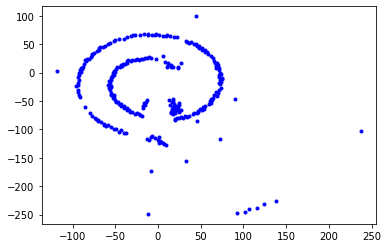

In [17]:
plt.plot(data['1'][:,0], data['1'][:,1], 'b.')

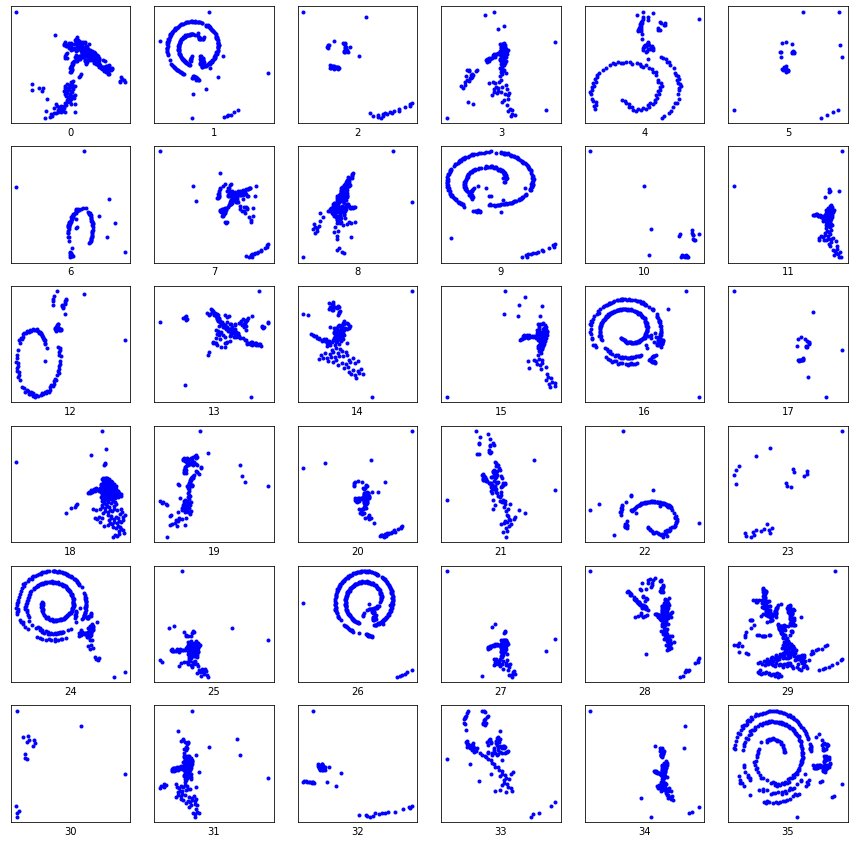

In [18]:
#xy plot
plt.figure(figsize=(15,15))
for i in range(36):
    x = str(i)
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.plot(data[x][:,0],data[x][:,1], 'b.')
    plt.xlabel(x)
plt.show()

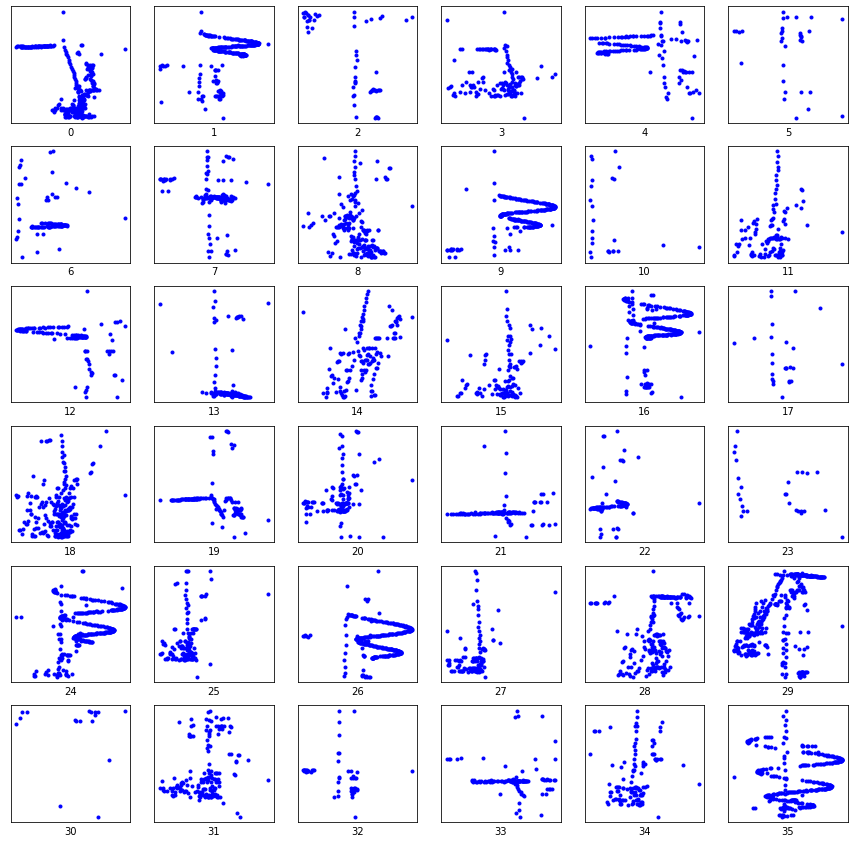

In [19]:
#yz plot
plt.figure(figsize=(15,15))
for i in range(36):
    x = str(i)
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.plot(data[x][:,1],data[x][:,2], 'b.')
    plt.xlabel(x)
plt.show()

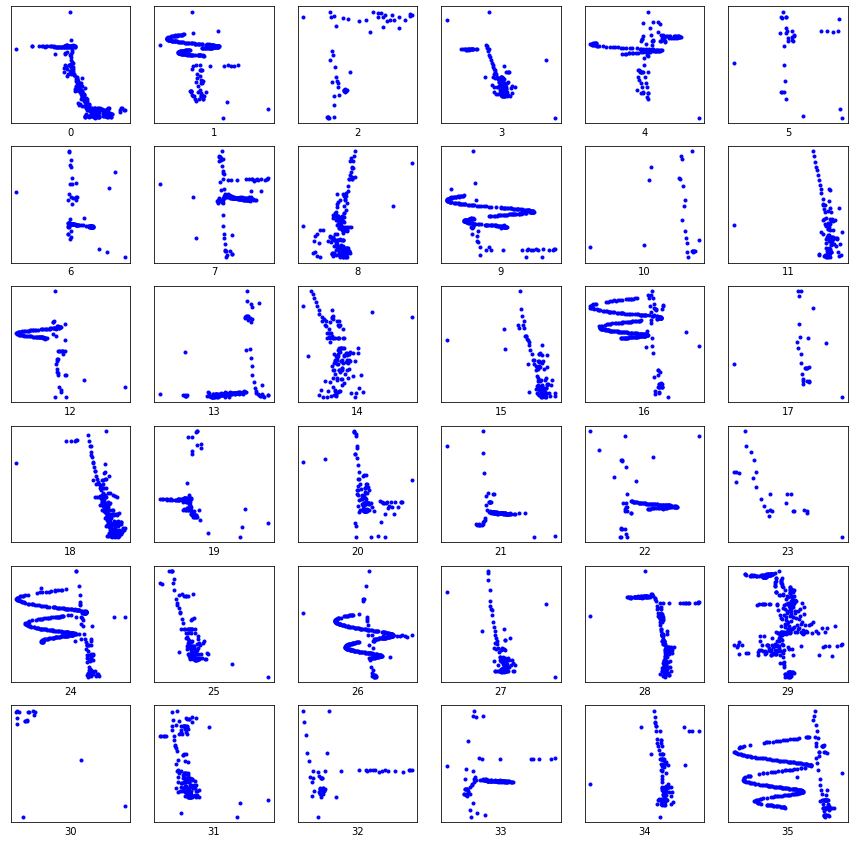

In [20]:
#xz plot
plt.figure(figsize=(15,15))
for i in range(36):
    x = str(i)
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.plot(data[x][:,0],data[x][:,2], 'b.')
    plt.xlabel(x)
plt.show()

In [21]:
from mpl_toolkits import mplot3d

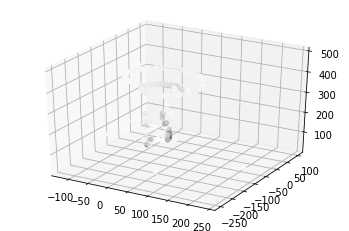

In [22]:
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = data['1'][:,2]
xdata = data['1'][:,0]
ydata = data['1'][:,1]
qdata = data['1'][:,3]
ax.scatter3D(xdata, ydata, zdata, c=qdata, cmap='Greys');

#, c=zdata, cmap='Greens'

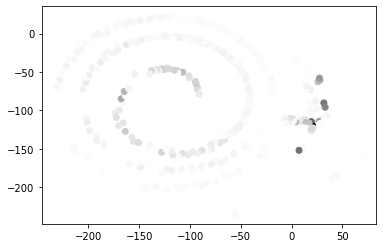

In [23]:
plt.scatter(data['35'][:,0], data['35'][:,1], c=data['35'][:,3], cmap='Greys')

In [28]:
list(data['1'])

[array([-5.03986899e+01,  8.93055455e-01,  3.04071903e+02,  3.09410595e+02,
         6.70300000e+03,  1.00000000e+01,  5.51255624e+00]),
 array([-9.23647293e+01, -1.38558829e+01,  3.66937615e+02,  1.22000000e+02,
         7.74700000e+03,  6.00000000e+00,  1.93955426e+01]),
 array([ -93.60749577,   -8.29125976,  365.92816074,  194.23078114,
        7980.        ,    8.        ,   18.88262243]),
 array([-5.34321460e+01, -8.44296259e+00,  3.05996544e+02,  3.24726262e+02,
         6.71100000e+03,  9.00000000e+00,  5.53229875e+00]),
 array([-5.19154179e+01, -3.77495357e+00,  3.04980650e+02,  3.94865073e+02,
         6.70800000e+03,  9.00000000e+00,  5.03143853e+00]),
 array([-5.24401738e+01, -1.02403813e+00,  3.04972352e+02,  3.12556837e+02,
         6.70500000e+03,  1.00000000e+01,  6.33131222e+00]),
 array([-9.38814574e+01, -1.85238919e+01,  3.67988764e+02,  1.86000000e+02,
         7.75000000e+03,  5.00000000e+00,  1.83471273e+01]),
 array([-9.53981855e+01, -2.31919009e+01,  3.68530612e+

In [76]:
#start downsampling
DETECTOR_LENGTH = 1000.0
DETECTOR_RADIUS = 275.0

x_disc = 20
y_disc = 20
z_disc = 20

x_inc = (2*DETECTOR_RADIUS)/x_disc
y_inc = (2*DETECTOR_RADIUS)/y_disc
z_inc = DETECTOR_LENGTH/z_disc

numBuckets = x_disc * y_disc * z_disc
discEvt[numBuckets]

NameError: name 'discEvt' is not defined

In [ ]:
#for i in range(69630):
#    evt_id=str(i)
#    n_evts = len(data[evt_id])
#    evt = data[evt_id]
##    t = evt.traces['data']
#    new_xyz = evt.xyzs(peaks_only=True, return_pads=True, baseline_correction=False, cg_times=False)
#    print(len(new_xyz))

In [78]:
#discElements = x_disc*y_disc*z_disc


#buckets = []
#charges = []
#num_pts = 0

#for point in new_xyz:
#    x_bucket = math.floor(((point[0]+DETECTOR_RADIUS)/(2*DETECTOR_RADIUS))*x_disc)
#    y_bucket = math.floor(((point[1]+DETECTOR_RADIUS)/(2*DETECTOR_RADIUS))*y_disc)
#    z_bucket = math.floor((point[2]/DETECTOR_LENGTH)*z_disc)

#    bucket_num = z_bucket*x_disc*y_disc + x_bucket + y_bucket*x_disc
    
    #sparse matrix implementation
#    buckets.append(bucket_num)
#    charges.append(point[3]/10)
    
#    num_pts += 1

#create csr matrix where data is chrage and row np.zeros(len(col)) of size (1, discElements)
#cols = buckets
#rows = np.zeros(len(cols))
#data = charges

#automatically sums data entries for data occuring at the same point
#no need for sum_duplicates()
#discretized_data_sparse_CHARGE  = sp.sparse.csr_matrix((data, (rows, cols)), shape=(1, discElements))


#print("buckets filled: " + str(len(np.unique(buckets))))
#print("charge acumulated: " + str(sum(data)))

In [75]:
for i in range(69630):
    evt_id=str(i)
    q = data[evt_id][:,4]
    xBucket = (((data[evt_id][:,0])+DETECTOR_RADIUS)/(2*DETECTOR_RADIUS))*x_disc
    yBucket = (((data[evt_id][:,1])+DETECTOR_RADIUS)/(2*DETECTOR_RADIUS))*y_disc
    zBucket = (((data[evt_id][:,2])+DETECTOR_RADIUS)/(2*DETECTOR_RADIUS))*z_disc
    n_evts = len(data[evt_id])
    bucketAddress = zBucket * x_disc * y_disc + xBucket + yBucket * x_disc
    discEvt[bucketAddress]+= q

NameError: name 'discEvt' is not defined